<a href="https://colab.research.google.com/github/ManasChandan/TwitterSentimentAnalysis/blob/main/Twitter_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.drop('id',axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


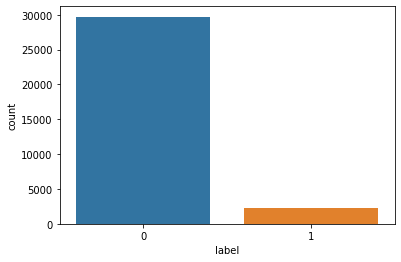

In [ ]:
import seaborn as sns
sns.countplot(train_data['label'])

In [ ]:
size = train_data.shape[0]
print(size)

31962


In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def prepare_corpus(tweets):
  corpus_tweets = []
  size = tweets.shape[0]
  ps = PorterStemmer()
  for i in range(0,size):
    tweet = re.sub(pattern='[^a-zA-Z]',repl=' ', string=tweets['tweet'][i])

    tweet = re.sub(pattern='user' , repl='' , string = tweet)

    tweet = tweet.lower()

    words = tweet.split()

    words = [ps.stem(word) for word in words if not word in stopwords.words('english')]

    tweet = ' '.join(words)

    corpus_tweets.append(tweet)
  return corpus_tweets

corpus_tweets_train = prepare_corpus(train_data)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000)
X_cv = cv.fit_transform(corpus_tweets_train).toarray()
y_cv = train_data['label'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=7000)
X_tfidf = tfidf.fit_transform(corpus_tweets_train).toarray()
y_ifidf = train_data['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
def split_train_test(X,y):
  X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.10)
  return X_train , X_test , y_train , y_test

X_train_cv , X_test_cv , y_train_cv , y_test_cv = split_train_test(X_cv , y_cv)
X_train_idf , X_test_idf , y_train_idf , y_test_idf = split_train_test(X_tfidf, y_ifidf)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def accuracy_check(model,data,label):
  y_pred = model.predict(data)
  print(classification_report(label , y_pred)) 
  accuracy = accuracy_score(label , y_pred)
  return accuracy

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_cv=MultinomialNB()

In [ ]:
nb_cv.fit(X_train_cv , y_train_cv)
nb_cv_accuracy = accuracy_check(nb_cv , X_test_cv , y_test_cv)
print(nb_cv_accuracy)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2976
           1       0.60      0.74      0.66       221

    accuracy                           0.95      3197
   macro avg       0.79      0.85      0.82      3197
weighted avg       0.95      0.95      0.95      3197

0.9483891147951204


In [ ]:
nb_idf = MultinomialNB()
nb_idf.fit(X_train_idf , y_train_idf)
nb_idf_accuracy = accuracy_check(nb_idf , X_test_idf , y_test_idf)
print(nb_idf_accuracy)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2992
           1       0.90      0.36      0.51       205

    accuracy                           0.96      3197
   macro avg       0.93      0.68      0.74      3197
weighted avg       0.95      0.96      0.95      3197

0.9562089458867689


In [ ]:
def optimization_idf(X_train_idf , X_test_idf , y_train_idf , y_test_idf):
  best_accuracy = 0.0
  alpha_val = 0.0
  for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train_idf, y_train_idf)
    temp_y_pred = temp_classifier.predict(X_test_idf)
    score = accuracy_score(y_test_idf, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
      best_accuracy = score
      alpha_val = i
  print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
  return alpha_val

In [ ]:
optimal_value_idf = optimization_idf(X_train_idf , X_test_idf , y_train_idf , y_test_idf)

Accuracy score for alpha=0.1 is: 96.59%
Accuracy score for alpha=0.2 is: 96.5%
Accuracy score for alpha=0.3 is: 96.4%
Accuracy score for alpha=0.4 is: 96.22%
Accuracy score for alpha=0.5 is: 96.12%
Accuracy score for alpha=0.6 is: 95.96%
Accuracy score for alpha=0.7 is: 95.9%
Accuracy score for alpha=0.8 is: 95.71%
Accuracy score for alpha=0.9 is: 95.62%
Accuracy score for alpha=1.0 is: 95.62%
The best accuracy is 96.59% with alpha value as 0.1


In [ ]:
ml_model_final = MultinomialNB(alpha = 0.1)
ml_model_final.fit(X_tfidf , y_ifidf)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
corpus_test = prepare_corpus(test_data)
vectors = tfidf.transform(corpus_test).toarray()

In [ ]:
answer = ml_model_final.predict(vectors)
print(answer)

[0 0 0 ... 0 0 0]


In [ ]:
answer.shape

(17197,)

In [ ]:
ones = [ans for ans in answer if ans==1]
len(ones)

688

In [ ]:
def optimization_cv(X_train_cv , X_test_cv , y_train_cv , y_test_cv):
  best_accuracy = 0.0
  alpha_val = 0.0
  for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train_cv, y_train_cv)
    temp_y_pred = temp_classifier.predict(X_test_cv)
    score = accuracy_score(y_test_cv, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
      best_accuracy = score
      alpha_val = i
  print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
  return alpha_val

In [ ]:
optimal_value_cv = optimization_cv(X_train_cv , X_test_cv , y_train_cv , y_test_cv)

Accuracy score for alpha=0.1 is: 94.96%
Accuracy score for alpha=0.2 is: 95.03%
Accuracy score for alpha=0.3 is: 95.03%
Accuracy score for alpha=0.4 is: 95.06%
Accuracy score for alpha=0.5 is: 95.0%
Accuracy score for alpha=0.6 is: 94.9%
Accuracy score for alpha=0.7 is: 94.87%
Accuracy score for alpha=0.8 is: 94.87%
Accuracy score for alpha=0.9 is: 94.87%
Accuracy score for alpha=1.0 is: 94.84%
The best accuracy is 95.06% with alpha value as 0.4


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding , LSTM , Dense , Bidirectional
from tensorflow.keras.models import Sequential

In [ ]:
training_size = 30000
corpus_training = corpus_tweets_train[:training_size]
corpus_test = corpus_tweets_train[training_size:]
y = train_data['label'].values
y_training = y[:training_size]
y_testing = y[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=10000 , oov_token='<OOV>')
tokenizer.fit_on_texts(corpus_training)
train_sequence = tokenizer.texts_to_sequences(corpus_training)
test_sequence = tokenizer.texts_to_sequences(corpus_test)

In [ ]:
train_sequence = pad_sequences(train_sequence , maxlen = 23 , padding='post')
test_sequence = pad_sequences(test_sequence , maxlen = 23 , padding = 'post')

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling1D , Dropout , BatchNormalization 

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000 , 64 , input_length=23))
model_lstm.add(Bidirectional(LSTM(100, activation='relu' , return_sequences=True)))
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())
model_lstm.add(Bidirectional(LSTM(50, activation='relu')))
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(128 , activation='relu'))
model_lstm.add(Dense(64 , activation='relu'))
model_lstm.add(Dense(1 , activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 23, 64)            640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 23, 200)           132000    
_________________________________________________________________
dropout (Dropout)            (None, 23, 200)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 200)           800       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 23, 100)           100400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 100)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 100)          

In [ ]:
model_lstm.fit(train_sequence , y_training , validation_data=(test_sequence , y_testing) , epochs=10)

Epoch 1/10
938/938 [==============================] - 119s 127ms/step - loss: 0.1320 - accuracy: 0.9573 - val_loss: 0.1087 - val_accuracy: 0.9634
Epoch 2/10
938/938 [==============================] - 120s 128ms/step - loss: 0.0719 - accuracy: 0.9760 - val_loss: 0.1147 - val_accuracy: 0.9639
Epoch 3/10
938/938 [==============================] - 119s 127ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.1372 - val_accuracy: 0.9593
Epoch 4/10
938/938 [==============================] - 120s 127ms/step - loss: 0.0283 - accuracy: 0.9902 - val_loss: 0.1581 - val_accuracy: 0.9600
Epoch 5/10
938/938 [==============================] - 118s 126ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.2323 - val_accuracy: 0.9599
Epoch 6/10
938/938 [==============================] - 118s 126ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.1931 - val_accuracy: 0.9574
Epoch 7/10
938/938 [==============================] - 119s 127ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.2091 -

In [ ]:
predictions_nn = model_lstm.predict(test_sequence)

In [ ]:
print(predictions_nn)